### LIVE STOCK DIEASES PREDICTION

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tkinter import *
import numpy as np
import pandas as pd
import os

In [2]:
l1=['anorexia','abdominal_pain','anaemia','abortions','acetone','aggression','arthrogyposis',
    'ankylosis','anxiety','bellowing','blood_loss','blood_poisoning','blisters','colic','Condemnation_of_livers',
    'coughing','depression','discomfort','dyspnea','dysentery','diarrhoea','dehydration','drooling',
    'dull','decreased_fertility','diffculty_breath','emaciation','encephalitis','fever','facial_paralysis','frothing_of_mouth',
    'frothing','gaseous_stomach','highly_diarrhoea','high_pulse_rate','high_temp','high_proportion','hyperaemia','hydrocephalus',
    'isolation_from_herd','infertility','intermittent_fever','jaundice','ketosis','loss_of_appetite','lameness',
    'lack_of-coordination','lethargy','lacrimation','milk_flakes','milk_watery','milk_clots',
    'mild_diarrhoea','moaning','mucosal_lesions','milk_fever','nausea','nasel_discharges','oedema',
    'pain','painful_tongue','pneumonia','photo_sensitization','quivering_lips','reduction_milk_vields','rapid_breathing',
    'rumenstasis','reduced_rumination','reduced_fertility','reduced_fat','reduces_feed_intake','raised_breathing','stomach_pain',
    'salivation','stillbirths','shallow_breathing','swollen_pharyngeal','swelling','saliva','swollen_tongue',
    'tachycardia','torticollis','udder_swelling','udder_heat','udder_hardeness','udder_redness','udder_pain','unwillingness_to_move',
    'ulcers','vomiting','weight_loss','weakness']

In [3]:
disease=['mastitis','blackleg','bloat','coccidiosis','cryptosporidiosis',
        'displaced_abomasum','gut_worms','listeriosis','liver_fluke','necrotic_enteritis','peri_weaning_diarrhoea',
        ' rift_valley_fever','rumen_acidosis',
        'traumatic_reticulitis','calf_diphtheria','foot_rot','foot_and_mouth','ragwort_poisoning','wooden_tongue','infectious_bovine_rhinotracheitis',
'acetonaemia','fatty_liver_syndrome','calf_pneumonia','schmallen_berg_virus','trypanosomosis','fog_fever']


In [4]:
l2=[]
for i in range(0,len(l1)):
    l2.append(0)
print(l2)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [6]:
df=pd.read_csv("/content/Training.csv")
DF= pd.read_csv('/content/Training.csv', index_col='prognosis')
#Replace the values in the imported file by pandas by the inbuilt function replace in pandas.

df.replace({'prognosis':{'mastitis':0,'blackleg':1,'bloat':2,'coccidiosis':3,'cryptosporidiosis':4,
'displaced_abomasum':5,'gut_worms':6,'listeriosis':7,'liver_fluke':8,'necrotic_enteritis':9,'peri_weaning_diarrhoea':10,
'rift_valley_fever':11,'rumen_acidosis':12,
'traumatic_reticulitis':13,'calf_diphtheria':14,'foot_rot':15,'foot_and_mouth':16,'ragwort_poisoning':17,'wooden_tongue':18,'infectious_bovine_rhinotracheitis':19,
'acetonaemia':20,'fatty_liver_syndrome':21,'calf_pneumonia':22,'schmallen_berg_virus':23,'trypanosomosis':24,'fog_fever':25}},inplace=True)
#df.head()
DF.head()

,anorexia,abdominal_pain,anaemia,abortions,acetone,aggression,arthrogyposis,ankylosis,anxiety,bellowing,...,udder_swelling,udder_heat,udder_hardeness,udder_redness,udder_pain,unwillingness_to_move,ulcers,vomiting,weight_loss,weakness
prognosis,,,,,,,,,,,,,,,,,,,,,
mastitis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mastitis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mastitis,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
mastitis,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
mastitis,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0


In [7]:
def plotPerColumnDistribution(df1, nGraphShown, nGraphPerRow):
    nunique = df1.nunique()
    df1 = df1[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df1.shape
    columnNames = list(df1)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [8]:
# Scatter and density plots
def plotScatterMatrix(df1, plotSize, textSize):
    df1 = df1.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df1 = df1.dropna('columns')
    df1 = df1[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df1 = df1[columnNames]
    ax = pd.plotting.scatter_matrix(df1, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df1.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

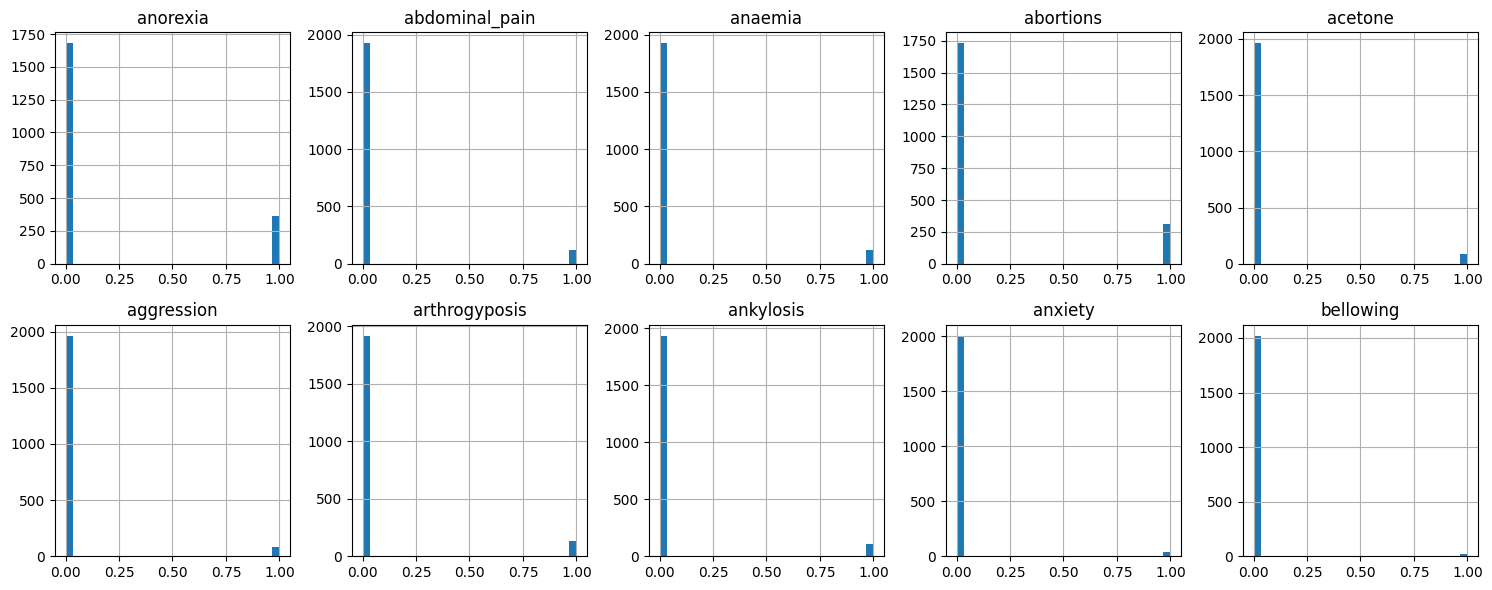

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

def plotPerColumnDistribution(df, num_cols, num_plots_per_row):
    num_rows = (num_cols + num_plots_per_row - 1) // num_plots_per_row
    fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(15, 3*num_rows))

    for i in range(num_rows):
        for j in range(num_plots_per_row):
            col_idx = i * num_plots_per_row + j
            if col_idx < num_cols:
                df.iloc[:, col_idx].hist(ax=axes[i, j], bins=30)
                axes[i, j].set_title(df.columns[col_idx])

    plt.tight_layout()
    plt.show()

# Usage example
plotPerColumnDistribution(df, 10, 5)


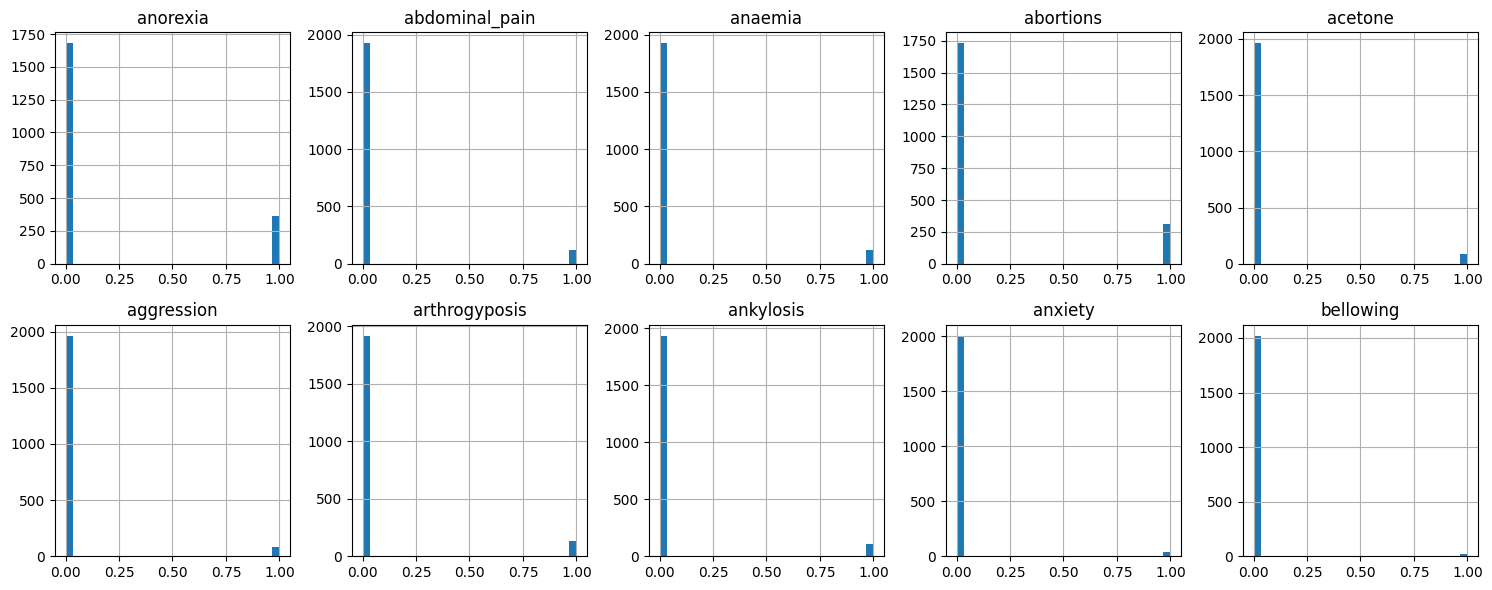

In [12]:
plotPerColumnDistribution(df, 10, 5)

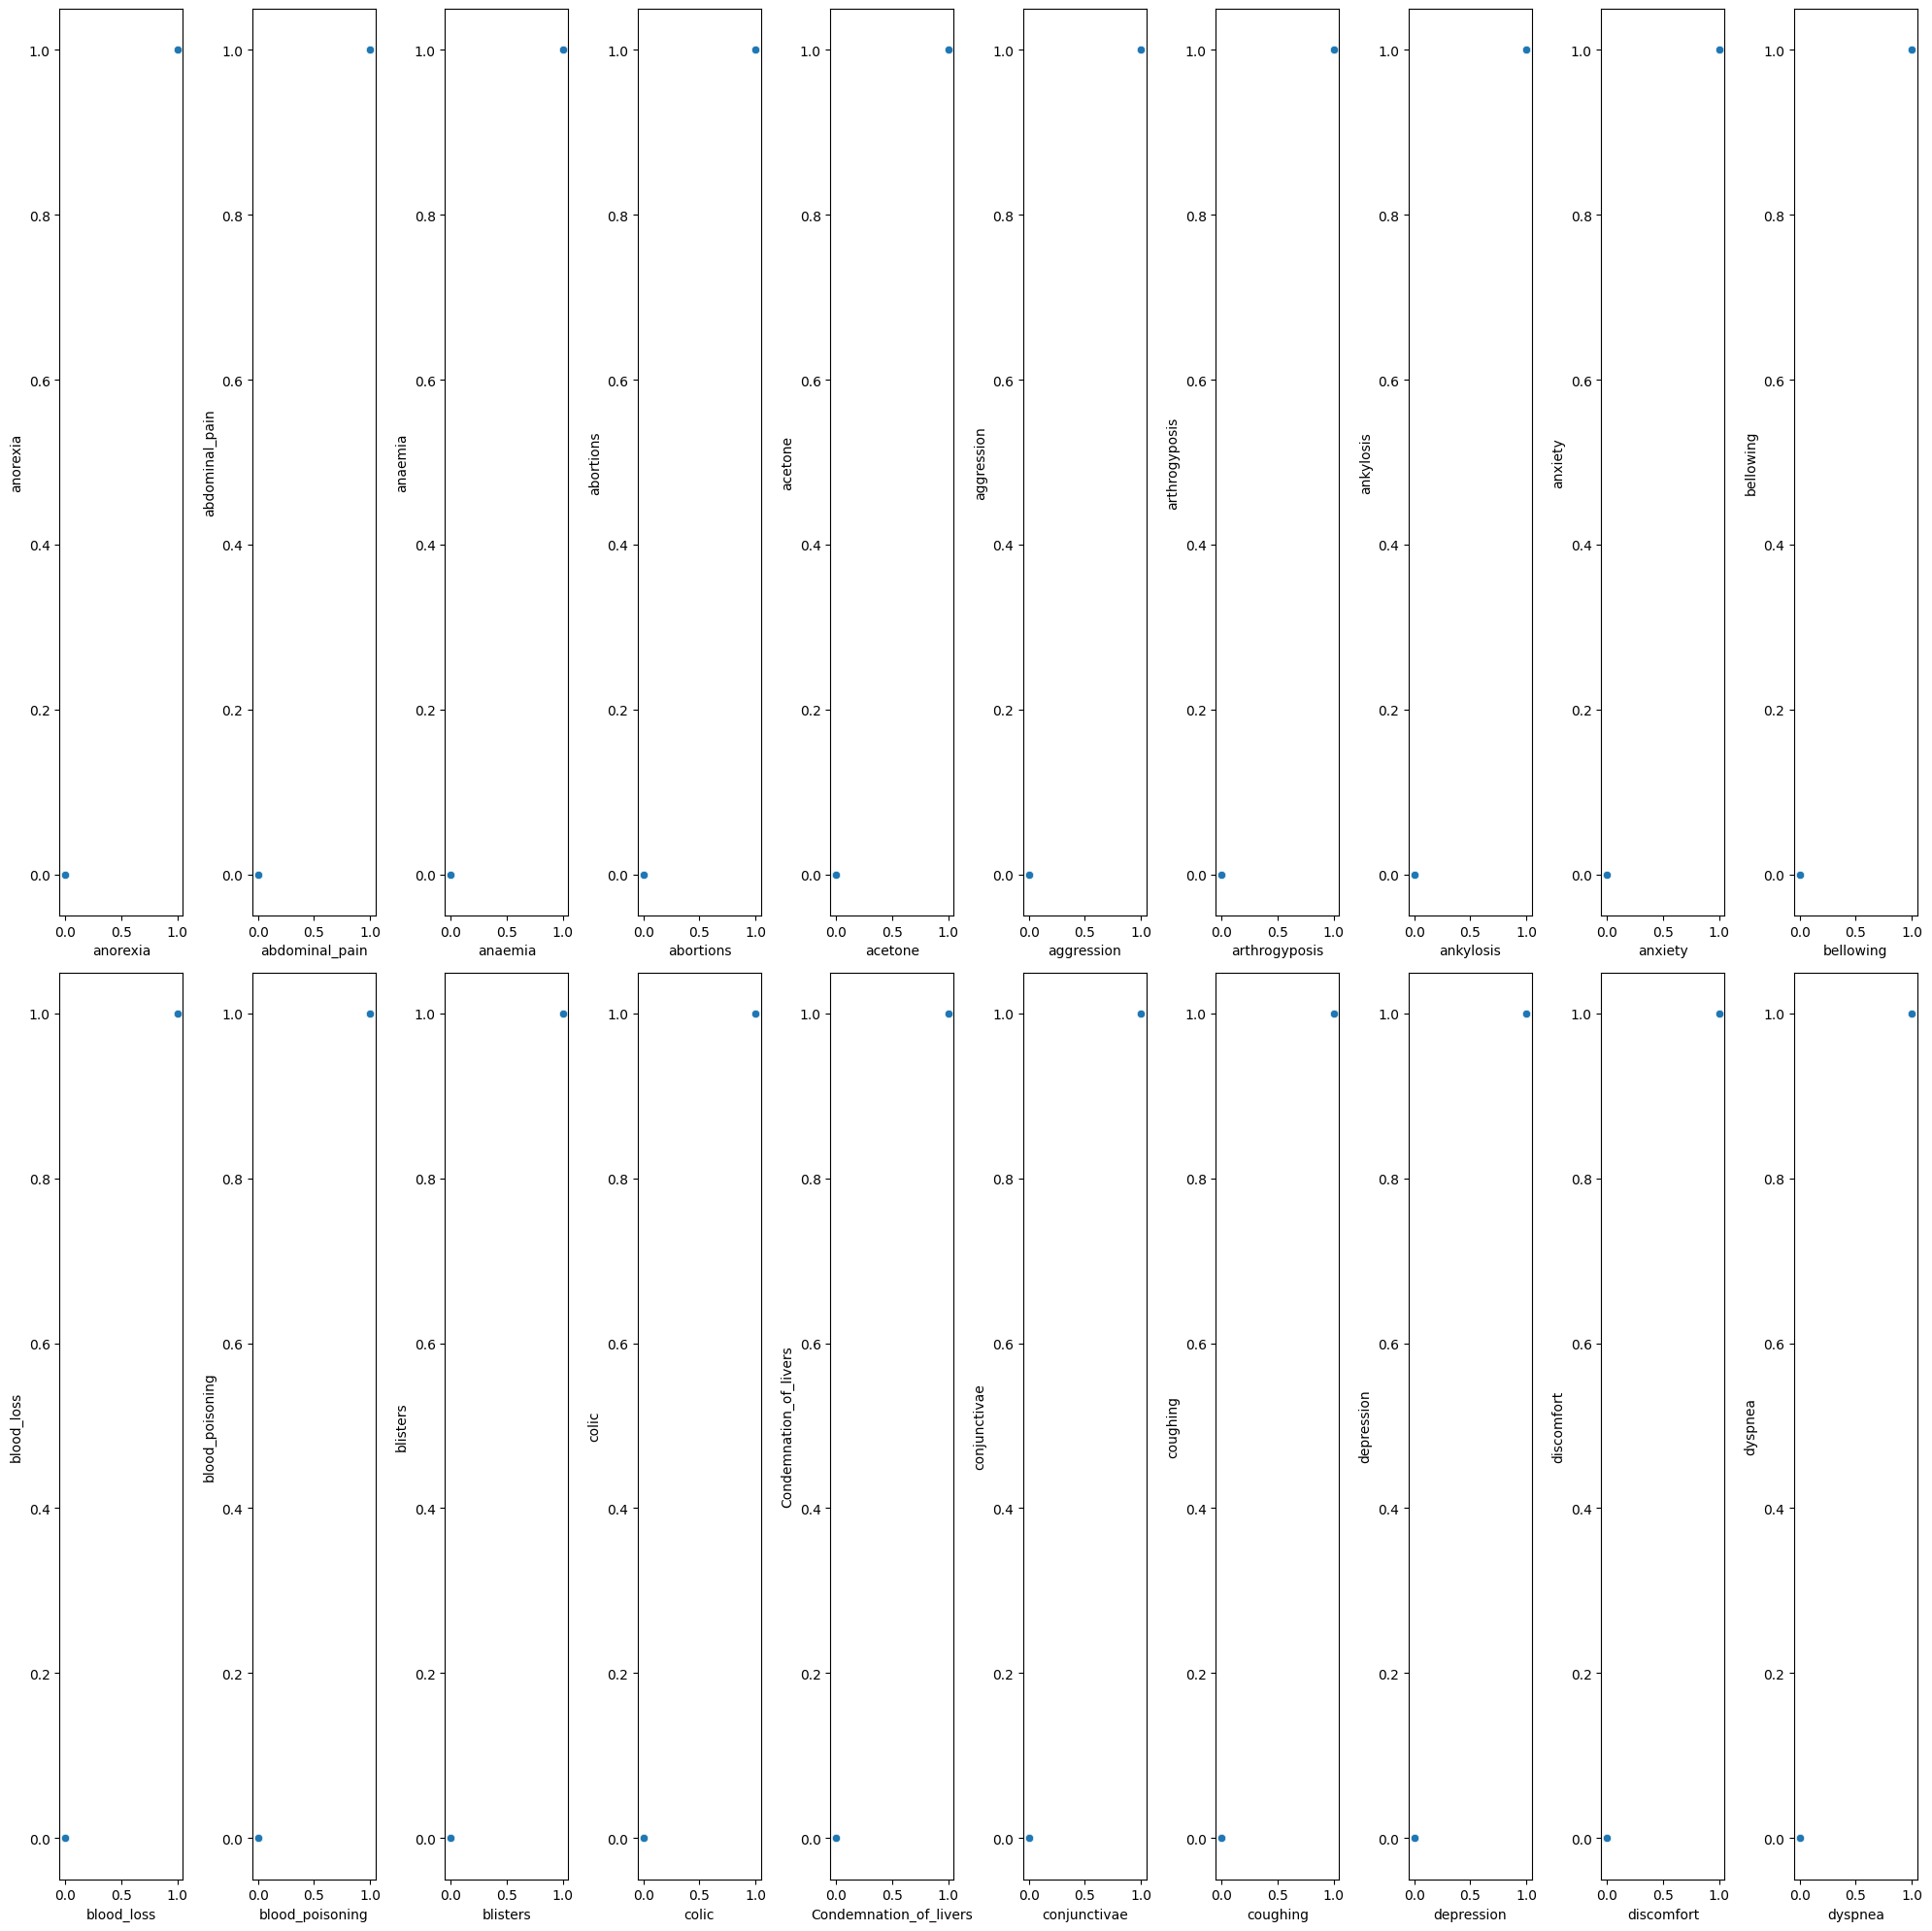

In [14]:
import pandas as pd
import seaborn as sns

def plotScatterMatrix(df, num_cols, num_plots_per_row):
    num_rows = (num_cols + num_plots_per_row - 1) // num_plots_per_row
    fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(20, 20))

    for i in range(num_rows):
        for j in range(num_plots_per_row):
            col_idx = i * num_plots_per_row + j
            if col_idx < num_cols:
                sns.scatterplot(x=df.columns[col_idx], y=df.columns[col_idx], data=df, ax=axes[i, j])

    plt.tight_layout()
    plt.show()

# Usage example
plotScatterMatrix(df, 20, 10)

In [15]:
X= df[l1]
y = df[["prognosis"]]
np.ravel(y)
print(X)

      anorexia  abdominal_pain  anaemia  abortions  acetone  aggression  \
0            0               0        0          0        0           0   
1            0               0        0          0        0           0   
2            0               0        0          0        0           0   
3            0               0        0          0        0           0   
4            0               0        0          0        0           0   
...        ...             ...      ...        ...      ...         ...   
2039         0               0        0          0        0           0   
2040         0               0        0          0        0           0   
2041         0               0        0          0        0           0   
2042         0               0        0          0        0           0   
2043         0               0        0          0        0           0   

      arthrogyposis  ankylosis  anxiety  bellowing  ...  udder_swelling  \
0                 0     

In [16]:
print(y)

      prognosis
0             0
1             0
2             0
3             0
4             0
...         ...
2039         12
2040         12
2041         12
2042         12
2043         13

[2044 rows x 1 columns]


In [18]:
tr=pd.read_csv("/content/Testing.csv")

#Using inbuilt function replace in pandas for replacing the values

tr.replace({'prognosis':{'mastitis':0,'blackleg':1,'bloat':2,'coccidiosis':3,'cryptosporidiosis':4,
'displaced_abomasum':5,'gut_worms':6,'listeriosis':7,'liver_fluke':8,'necrotic_enteritis':9,'peri_weaning_diarrhoea':10,
'rift_valley_fever':11,'rumen_acidosis':12,
'traumatic_reticulitis':13,'calf_diphtheria':14,'foot_rot':15,'foot_and_mouth':16,'ragwort_poisoning':17,'wooden_tongue':18,'infectious_bovine_rhinotracheitis':19,
'acetonaemia':20,'fatty_liver_syndrome':21,'calf_pneumonia':22,'schmallen_berg_virus':23,'trypanosomosis':24,'fog_fever':25}},inplace=True)
tr.head()

,anorexia,abdominal_pain,anaemia,abortions,acetone,aggression,arthrogyposis,ankylosis,anxiety,bellowing,...,udder_heat,udder_hardeness,udder_redness,udder_pain,unwillingness_to_move,ulcers,vomiting,weight_loss,weakness,prognosis
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,4


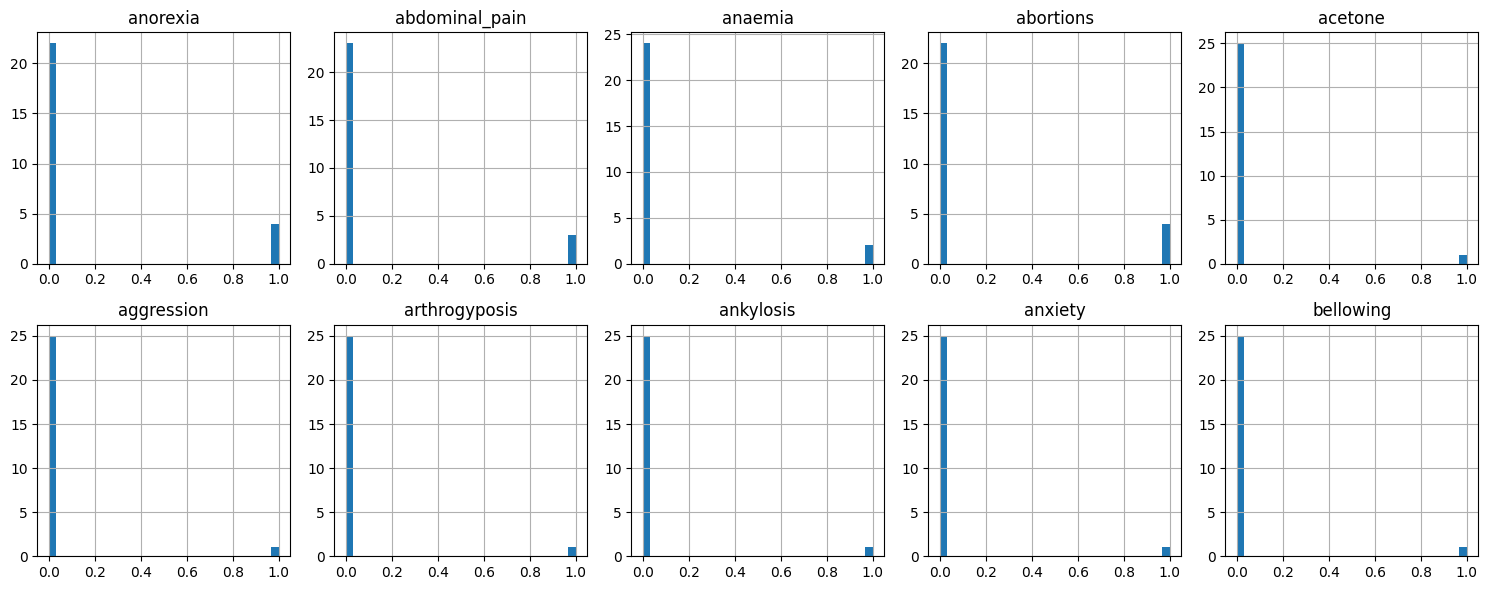

In [19]:
plotPerColumnDistribution(tr, 10, 5)

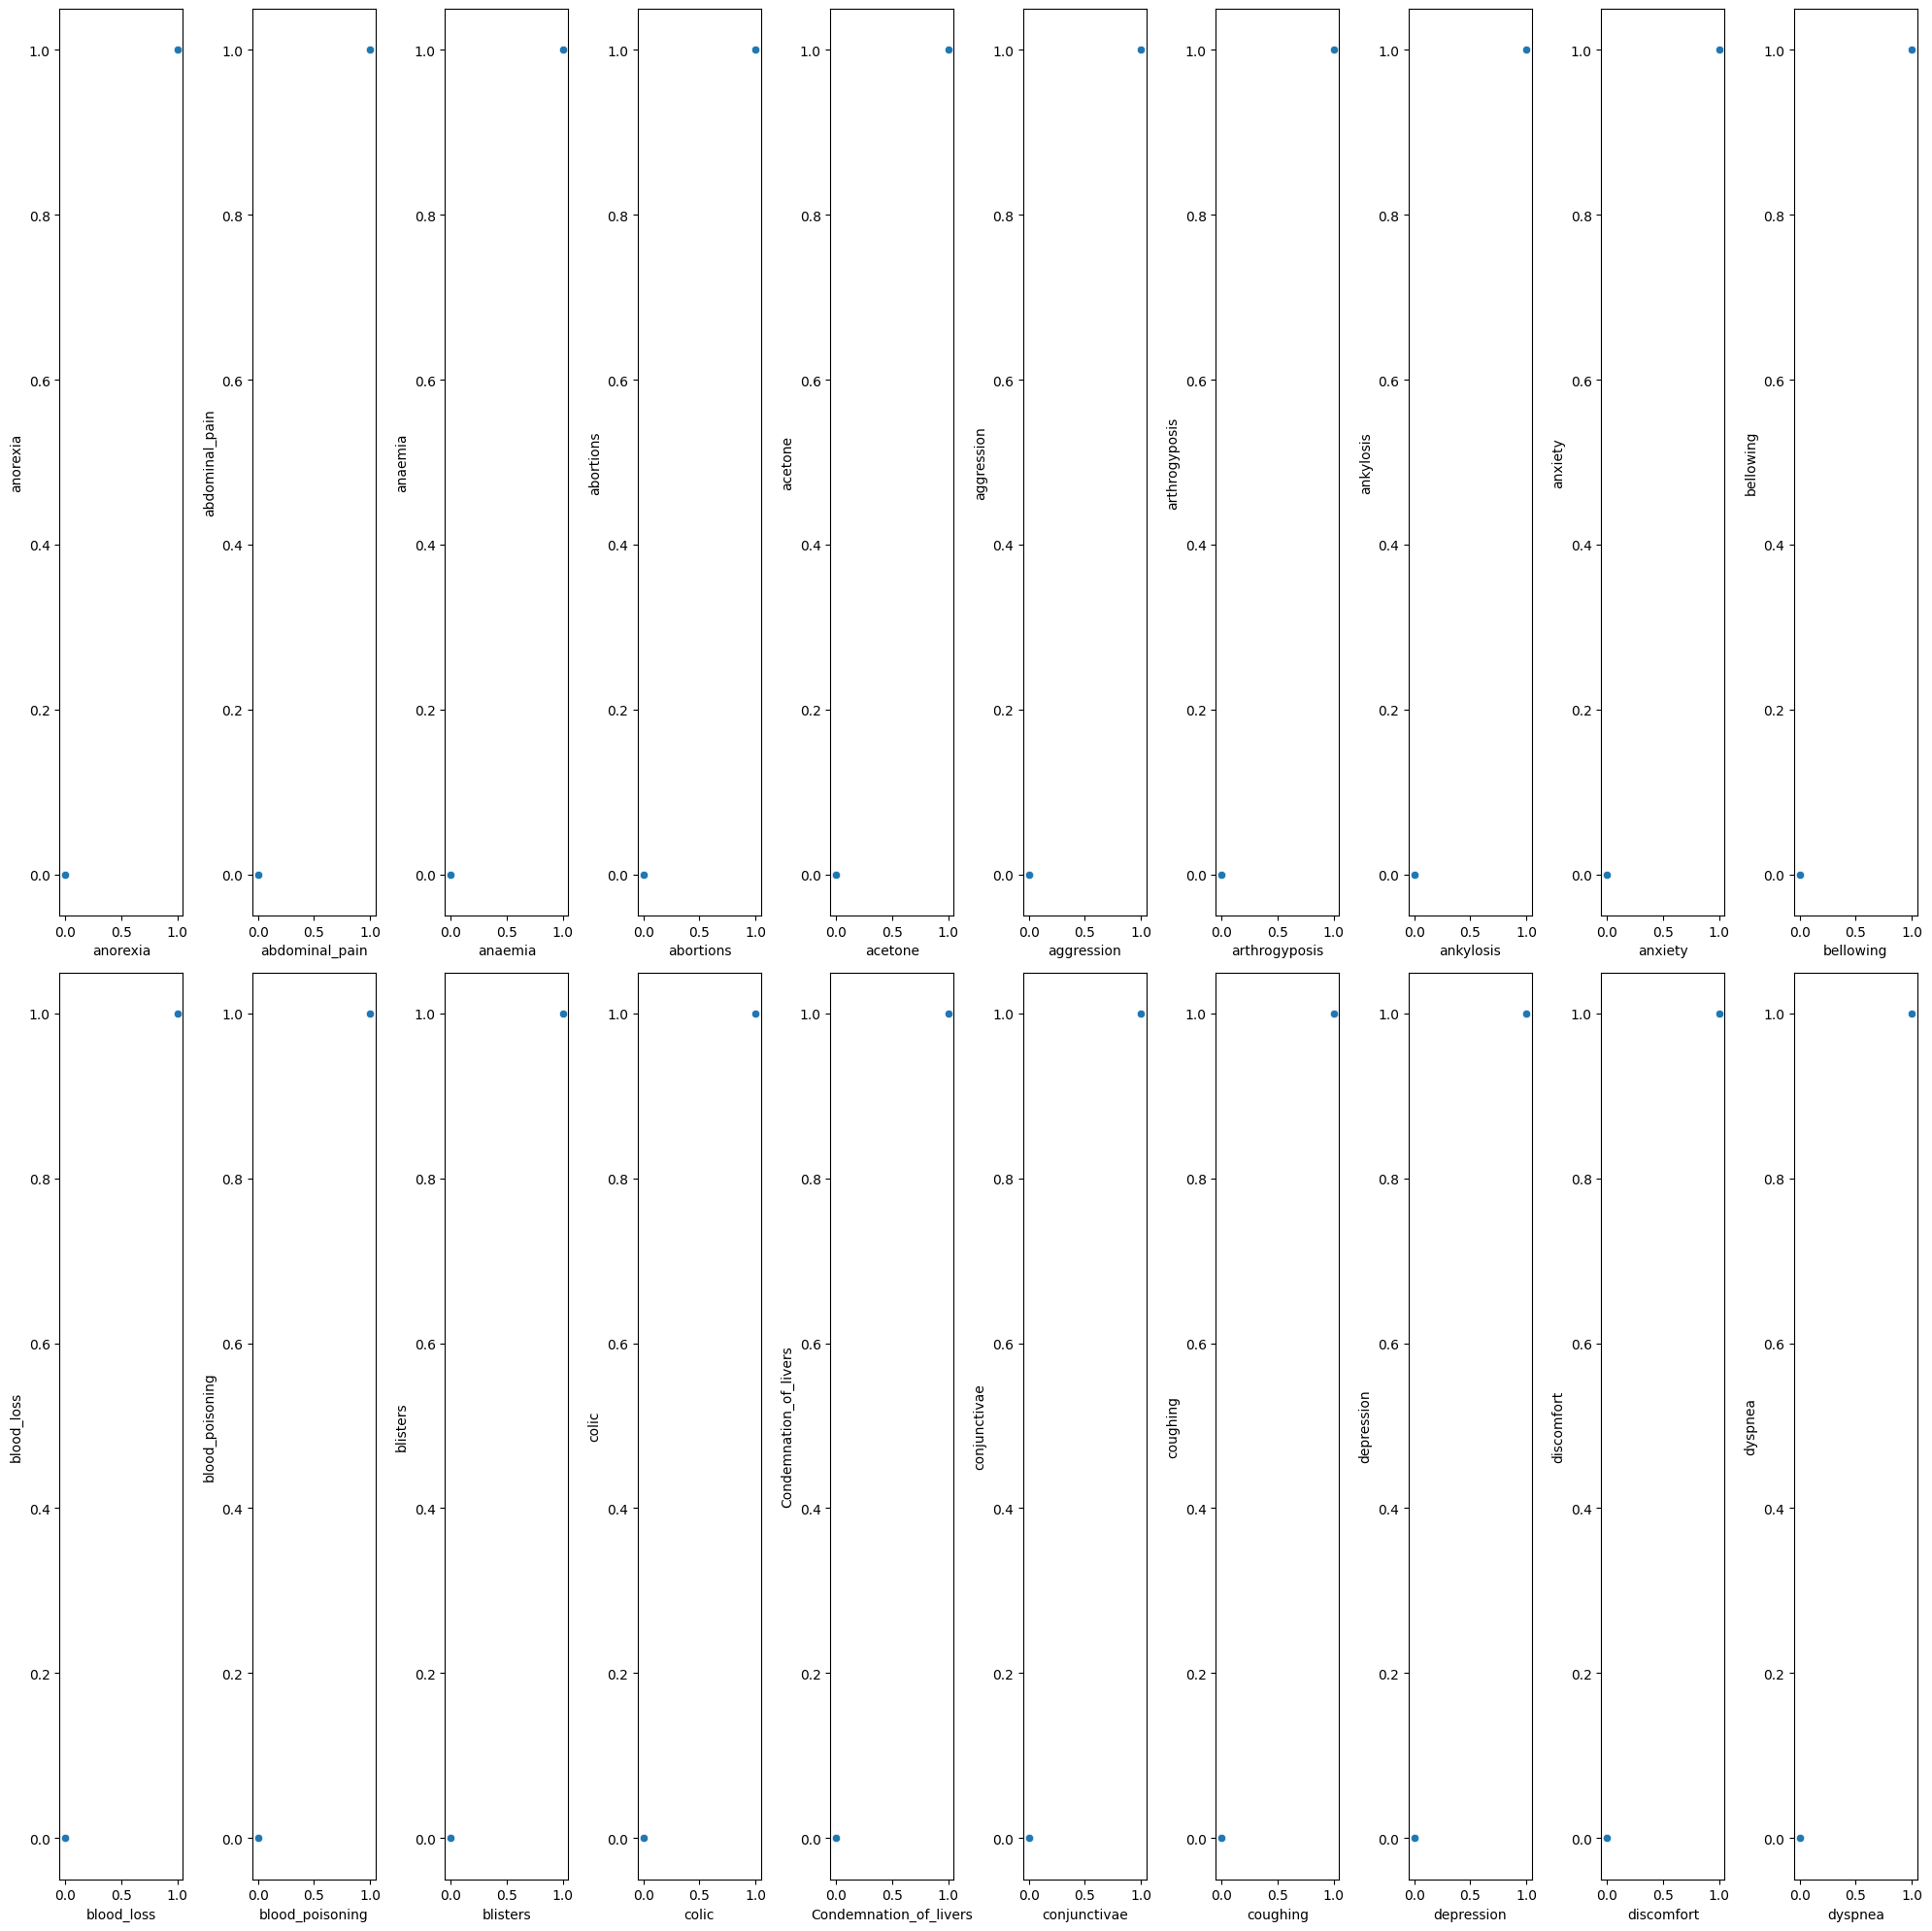

In [20]:
plotScatterMatrix(tr, 20, 10)

In [21]:
X_test= tr[l1]
y_test = tr[["prognosis"]]
np.ravel(y_test)
print(X_test)

    anorexia  abdominal_pain  anaemia  abortions  acetone  aggression  \
0          0               0        0          0        0           0   
1          1               0        0          0        0           0   
2          0               0        0          0        0           0   
3          0               0        0          0        0           0   
4          0               0        0          0        0           0   
5          0               0        0          0        0           0   
6          0               1        0          0        0           0   
7          0               0        0          1        0           0   
8          0               0        1          0        0           0   
9          0               0        0          0        0           0   
10         0               0        0          0        0           0   
11         1               0        0          1        0           0   
12         0               0        0          0   

In [22]:
print(y_test)

    prognosis
0           0
1           1
2           2
3           3
4           4
5           5
6           6
7           7
8           8
9           9
10         10
11         11
12         12
13         13
14         14
15         15
16         16
17         17
18         18
19         19
20         20
21         21
22         22
23         23
24         24
25         25


To build the precision of the model, we utilized three distinctive algorithms which are as per the following

Decision Tree algorithm,
Random Forest algorithm,
Naive bayes algorithm algorithm,
K-Nearest neighbour algorithm.

In [23]:
def scatterplt(disea):
    x = ((DF.loc[disea]).sum())#total sum of symptom reported for given disease
    x.drop(x[x==0].index,inplace=True)#droping symptoms with values 0
    print(x.values)
    y = x.keys()#storing nameof symptoms in y
    print(len(x))
    print(len(y))
    plt.title(disea)
    plt.scatter(y,x.values)
    plt.show()

def scatterinp(sym1,sym2,sym3,sym4,sym5):
    x = [sym1,sym2,sym3,sym4,sym5]#storing input symptoms in y
    y = [0,0,0,0,0]#creating and giving values to the input symptoms
    if(sym1!='Select Here'):
        y[0]=1
    if(sym2!='Select Here'):
        y[1]=1
    if(sym3!='Select Here'):
        y[2]=1
    if(sym4!='Select Here'):
        y[3]=1
    if(sym5!='Select Here'):
        y[4]=1
    print(x)
    print(y)
    plt.scatter(x,y)
    plt.show()

In [25]:
from tkinter import Tk, StringVar, messagebox
from sklearn.ensemble import RandomForestClassifier
import sqlite3

def RandomForest():
    if len(NameEn.get()) == 0:
        pred1.set(" ")
        comp=messagebox.askokcancel("System","Kindly Fill the Name")
        if comp:
            root.mainloop()
    elif((Symptom1.get()=="Select Here") or (Symptom2.get()=="Select Here")):
        pred1.set(" ")
        sym=messagebox.askokcancel("System","Kindly Fill atleast first two Symptoms")
        if sym:
            root.mainloop()
    else:
        # Importing Random Forest Classifier from sklearn
        from sklearn.ensemble import RandomForestClassifier

        # Creating a Random Forest Classifier instance
        clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)

        # Fitting the classifier on training data
        clf_rf.fit(X, y)

        # Predicting on test data
        y_pred_rf = clf_rf.predict(X_test)

        print("Random Forest")
        print("Accuracy")
        print(accuracy_score(y_test, y_pred_rf))
        print("Confusion matrix")
        print(confusion_matrix(y_test, y_pred_rf))

        # Fetching symptoms entered by user
        psymptoms = [Symptom1.get(), Symptom2.get(), Symptom3.get(), Symptom4.get(), Symptom5.get()]

        # Converting symptoms into binary form
        for k in range(0, len(l1)):
            for z in psymptoms:
                if(z == l1[k]):
                    l2[k] = 1

        inputtest = [l2]

        # Predicting disease using Random Forest model
        predict_rf = clf_rf.predict(inputtest)
        predicted_rf = predict_rf[0]

        # Checking if the predicted disease is in the list of diseases
        h = 'no'
        for a in range(0, len(disease)):
            if(predicted_rf == a):
                h = 'yes'
                break

        if (h == 'yes'):
            pred1.set(" ")
            pred1.set(disease[a])
        else:
            pred1.set(" ")
            pred1.set("Not Found")

        # Creating or connecting to the SQLite database
        conn = sqlite3.connect('database.db')
        c = conn.cursor()
        c.execute("CREATE TABLE IF NOT EXISTS RandomForest(Name StringVar,Symtom1 StringVar,Symtom2 StringVar,Symtom3 StringVar,Symtom4 TEXT,Symtom5 TEXT,Disease StringVar)")
        c.execute("INSERT INTO RandomForest(Name,Symtom1,Symtom2,Symtom3,Symtom4,Symtom5,Disease) VALUES(?,?,?,?,?,?,?)",(NameEn.get(),Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get(),pred1.get()))
        conn.commit()
        c.close()
        conn.close()

        # Printing scatter plot of input symptoms
        # Printing scatter plot of disease predicted vs its symptoms
        scatterinp(Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get())
        scatterplt(pred1.get())


In [26]:
from tkinter import Tk, StringVar, messagebox
from sklearn.neighbors import KNeighborsClassifier
import sqlite3

def KNN():
    if len(NameEn.get()) == 0:
        pred1.set(" ")
        comp=messagebox.askokcancel("System","Kindly Fill the Name")
        if comp:
            root.mainloop()
    elif((Symptom1.get()=="Select Here") or (Symptom2.get()=="Select Here")):
        pred1.set(" ")
        sym=messagebox.askokcancel("System","Kindly Fill atleast first two Symptoms")
        if sym:
            root.mainloop()
    else:
        # Importing KNeighborsClassifier from sklearn
        from sklearn.neighbors import KNeighborsClassifier

        # Creating a KNN classifier instance
        knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

        # Fitting the classifier on training data
        knn.fit(X, np.ravel(y))

        # Predicting on test data
        y_pred_knn = knn.predict(X_test)

        print("K Nearest Neighbors")
        print("Accuracy")
        print(accuracy_score(y_test, y_pred_knn))
        print("Confusion matrix")
        print(confusion_matrix(y_test, y_pred_knn))

        # Fetching symptoms entered by user
        psymptoms = [Symptom1.get(), Symptom2.get(), Symptom3.get(), Symptom4.get(), Symptom5.get()]

        # Converting symptoms into binary form
        for k in range(0, len(l1)):
            for z in psymptoms:
                if(z == l1[k]):
                    l2[k] = 1

        inputtest = [l2]

        # Predicting disease using KNN model
        predict_knn = knn.predict(inputtest)
        predicted_knn = predict_knn[0]

        # Checking if the predicted disease is in the list of diseases
        h = 'no'
        for a in range(0, len(disease)):
            if(predicted_knn == a):
                h = 'yes'
                break

        if (h == 'yes'):
            pred4.set(" ")
            pred4.set(disease[a])
        else:
            pred4.set(" ")
            pred4.set("Not Found")

        # Creating or connecting to the SQLite database
        conn = sqlite3.connect('database.db')
        c = conn.cursor()
        c.execute("CREATE TABLE IF NOT EXISTS KNearestNeighbour(Name StringVar,Symtom1 StringVar,Symtom2 StringVar,Symtom3 StringVar,Symtom4 TEXT,Symtom5 TEXT,Disease StringVar)")
        c.execute("INSERT INTO KNearestNeighbour(Name,Symtom1,Symtom2,Symtom3,Symtom4,Symtom5,Disease) VALUES(?,?,?,?,?,?,?)",(NameEn.get(),Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get(),pred4.get()))
        conn.commit()
        c.close()
        conn.close()

        # Printing scatter plot of disease predicted vs its symptoms
        scatterplt(pred4.get())


In [27]:
from tkinter import Tk, StringVar, messagebox
from sklearn.naive_bayes import GaussianNB
import sqlite3

def NaiveBayes():
    if len(NameEn.get()) == 0:
        pred1.set(" ")
        comp=messagebox.askokcancel("System","Kindly Fill the Name")
        if comp:
            root.mainloop()
    elif((Symptom1.get()=="Select Here") or (Symptom2.get()=="Select Here")):
        pred1.set(" ")
        sym=messagebox.askokcancel("System","Kindly Fill atleast first two Symptoms")
        if sym:
            root.mainloop()
    else:
        # Importing Gaussian Naive Bayes from sklearn
        from sklearn.naive_bayes import GaussianNB

        # Creating a Gaussian Naive Bayes classifier instance
        gnb = GaussianNB()

        # Fitting the classifier on training data
        gnb.fit(X, np.ravel(y))

        # Predicting on test data
        y_pred_gnb = gnb.predict(X_test)

        print("Naive Bayes")
        print("Accuracy")
        print(accuracy_score(y_test, y_pred_gnb))
        print("Confusion matrix")
        print(confusion_matrix(y_test, y_pred_gnb))

        # Fetching symptoms entered by user
        psymptoms = [Symptom1.get(), Symptom2.get(), Symptom3.get(), Symptom4.get(), Symptom5.get()]

        # Converting symptoms into binary form
        for k in range(0, len(l1)):
            for z in psymptoms:
                if(z == l1[k]):
                    l2[k] = 1

        inputtest = [l2]

        # Predicting disease using Naive Bayes model
        predict_gnb = gnb.predict(inputtest)
        predicted_gnb = predict_gnb[0]

        # Checking if the predicted disease is in the list of diseases
        h = 'no'
        for a in range(0, len(disease)):
            if(predicted_gnb == a):
                h = 'yes'
                break

        if (h == 'yes'):
            pred3.set(" ")
            pred3.set(disease[a])
        else:
            pred3.set(" ")
            pred3.set("Not Found")

        # Creating or connecting to the SQLite database
        conn = sqlite3.connect('database.db')
        c = conn.cursor()
        c.execute("CREATE TABLE IF NOT EXISTS NaiveBayes(Name StringVar,Symtom1 StringVar,Symtom2 StringVar,Symtom3 StringVar,Symtom4 TEXT,Symtom5 TEXT,Disease StringVar)")
        c.execute("INSERT INTO NaiveBayes(Name,Symtom1,Symtom2,Symtom3,Symtom4,Symtom5,Disease) VALUES(?,?,?,?,?,?,?)",(NameEn.get(),Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get(),pred3.get()))
        conn.commit()
        c.close()
        conn.close()

        # Printing scatter plot of disease predicted vs its symptoms
        scatterplt(pred3.get())


In [33]:
from sklearn.ensemble import RandomForestClassifier

def RandomForest():
    if len(NameEn.get()) == 0:
        pred1.set(" ")
        comp=messagebox.askokcancel("System","Kindly Fill the Name")
        if comp:
            root.mainloop()
    elif((Symptom1.get()=="Select Here") or (Symptom2.get()=="Select Here")):
        pred1.set(" ")
        sym=messagebox.askokcancel("System","Kindly Fill atleast first two Symptoms")
        if sym:
            root.mainloop()
    else:
        # Importing RandomForestClassifier from sklearn
        from sklearn.ensemble import RandomForestClassifier

        # Creating a Random Forest classifier instance
        clf_rf = RandomForestClassifier(n_estimators=100)

        # Fitting the classifier on training data
        clf_rf.fit(X, np.ravel(y))

        # Predicting on test data
        y_pred_rf = clf_rf.predict(X_test)

        # Print accuracy and confusion matrix
        print("Random Forest")
        print("Accuracy")
        print(accuracy_score(y_test, y_pred_rf))
        print("Confusion matrix")
        print(confusion_matrix(y_test, y_pred_rf))

        # Fetching symptoms entered by user
        psymptoms = [Symptom1.get(), Symptom2.get(), Symptom3.get(), Symptom4.get(), Symptom5.get()]

        # Converting symptoms into binary form
        for k in range(0, len(l1)):
            for z in psymptoms:
                if(z == l1[k]):
                    l2[k] = 1

        inputtest = [l2]

        # Predicting disease using Random Forest model
        predict_rf = clf_rf.predict(inputtest)
        predicted_rf = predict_rf[0]

        # Checking if the predicted disease is in the list of diseases
        h = 'no'
        for a in range(0, len(disease)):
            if(predicted_rf == a):
                h = 'yes'
                break

        if (h == 'yes'):
            pred_rf.set(" ")
            pred_rf.set(disease[a])
        else:
            pred_rf.set(" ")
            pred_rf.set("Not Found")

        # Creating or connecting to the SQLite database
        conn = sqlite3.connect('database.db')
        c = conn.cursor()
        c.execute("CREATE TABLE IF NOT EXISTS RandomForest(Name StringVar,Symtom1 StringVar,Symtom2 StringVar,Symtom3 StringVar,Symtom4 TEXT,Symtom5 TEXT,Disease StringVar)")
        c.execute("INSERT INTO RandomForest(Name,Symtom1,Symtom2,Symtom3,Symtom4,Symtom5,Disease) VALUES(?,?,?,?,?,?,?)",(NameEn.get(),Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get(),pred_rf.get()))
        conn.commit()
        c.close()
        conn.close()

        # Printing scatter plot of disease predicted vs its symptoms
        scatterplt(pred_rf.get())


SVM


In [34]:
from sklearn.svm import SVC

def SVM():
    # Similar to other functions, implement logic to handle missing values and prediction using SVM
    pass


LOGISTICS REGRESSION

In [35]:
from sklearn.linear_model import LogisticRegression

def LogisticRegression():
    # Similar to other functions, implement logic to handle missing values and prediction using Logistic Regression
    pass



Gradient Boosting
```

```



In [36]:
from sklearn.ensemble import GradientBoostingClassifier

def GradientBoosting():
    # Similar to other functions, implement logic to handle missing values and prediction using Gradient Boosting
    pass
